In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r'C:\Users\RavindharRajula\NareshIT\Data_set_files\Visadataset.csv')
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [3]:
cat_cols=visa_df.select_dtypes(include='object').columns
cat_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

- There are total 25480 applicants are there
- in that 25k appicants 17018 applicants got visa
- 8462 applicants did not get the visa
- also there are 16861 applicants are applied for vidsa from asia
- we want to know how many applicants from asia got certified
- and how many applicants from asia got denied


### Bi-variate anlaysis

In [5]:
# step 1 : select the continent data
# step 2 : continent data=='asia' it is con1
# step 3 : select the case status data
# step 4 : case status data == 'certified' is con2
# step 5 : con= con1 & con2
# step 6 : apply main df on con get the len

len(visa_df[(visa_df['continent']=='Asia') & (visa_df['case_status']=='Certified')])   # got visa from asia

11012

In [6]:
len(visa_df[(visa_df['continent']=='Asia') & (visa_df['case_status']=='Denied')])     # not got visa from asia 

5849

In [7]:
certified=[]
denied=[]
for conti in visa_df['continent'].unique():
    certified.append(len(visa_df[(visa_df['continent']==conti) & (visa_df['case_status']=='Certified')]))
    denied.append(len(visa_df[(visa_df['continent']==conti) & (visa_df['case_status']=='Denied')]))
colmns=sorted(visa_df.case_status.unique())
pd.DataFrame(zip(certified,denied),columns=colmns,index=visa_df['continent'].unique())

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


### short_cut : Cross_tab

In [9]:
ct=pd.crosstab(visa_df.continent,visa_df.case_status,normalize='index')
ct

case_status,Certified,Denied
continent,,
Africa,0.720508,0.279492
Asia,0.653105,0.346895
Europe,0.792337,0.207663
North America,0.618773,0.381227
Oceania,0.635417,0.364583
South America,0.578638,0.421362


<Axes: xlabel='continent'>

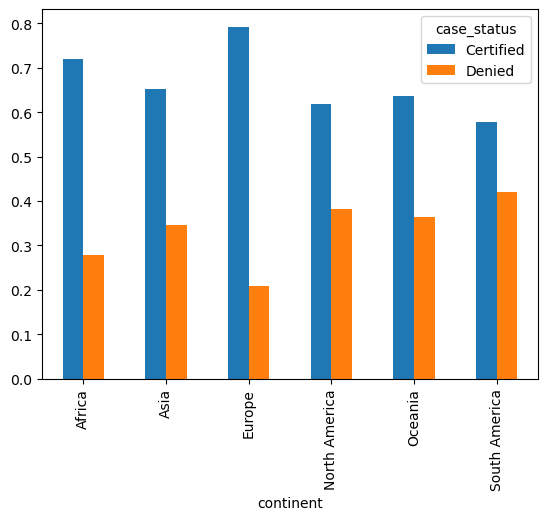

In [10]:
ct.plot(kind='bar')

In [ ]:
sns.heatmap(ct,annot=True,cmap="YlGnBu",fmt='g')

# **case_status - continent - education**

- from asia there 16k applicants applied for visa
    - in that 11k ppl got certified
    - in that 11k ppl different education applicants are available
- we want those information

In [11]:
case_st=visa_df.case_status
continent=visa_df.continent
education=visa_df.education_of_employee
cols=[education,case_st]
crosstab2=pd.crosstab(continent,cols)
crosstab2

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

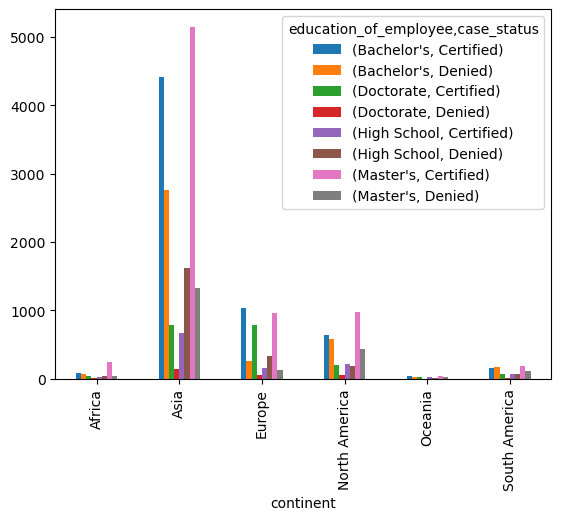

In [12]:
crosstab2.plot(kind='bar')

### Groupby

In [13]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [14]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [15]:
visa_df.groupby('education_of_employee').size()   # alternative to value_counts

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [16]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [17]:
 # we can also implement the cross tab with Groupby 
new_data=visa_df[visa_df['case_status']=='Certified']
new_data.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [18]:
visa_df[visa_df['continent']=='Asia'].groupby('continent')['prevailing_wage'].min()

continent
Asia    3.3188
Name: prevailing_wage, dtype: float64

- we have seen 2 variables case status and continent
- we also seen 3 variables case status , continent and education of employee
- we also done similar analysis using groupby
- only categorical column is completed
- only Numerical column is completed
- Also bi_variate and multivariate anlysis completed.

**Now we need to perform two numerical column anlaysis**
- this will give relation b/w **two columns** which are numerical nature
- so we can perform **correlation matrix**  to get the relationship
- also we need to perform **scatter plot** to visualize the relationship

In [20]:
cat_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [21]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

### Scatter plot (plt.scatter)

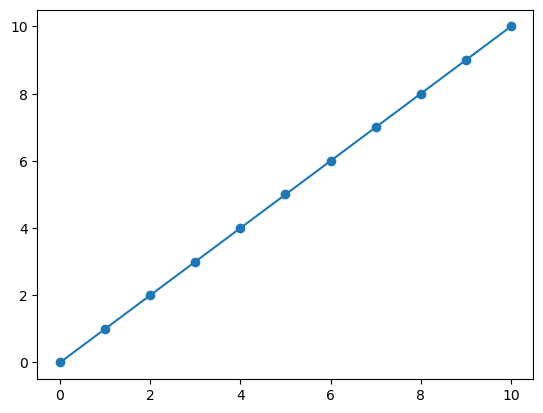

In [25]:
x=list(range(0,11))
y=list(range(0,11))
plt.scatter(x,y)
plt.plot(x,y)

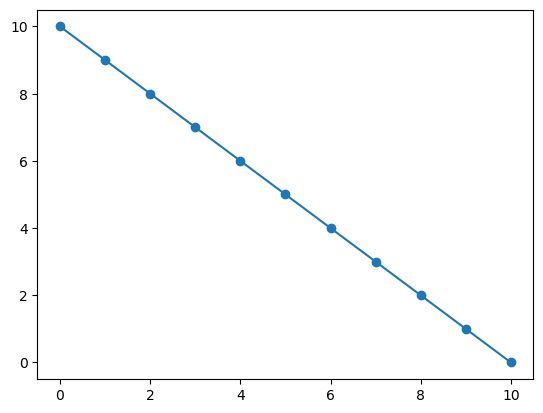

In [29]:
plt.scatter(x,list(reversed(y)))
plt.plot(x,list(reversed(y)))

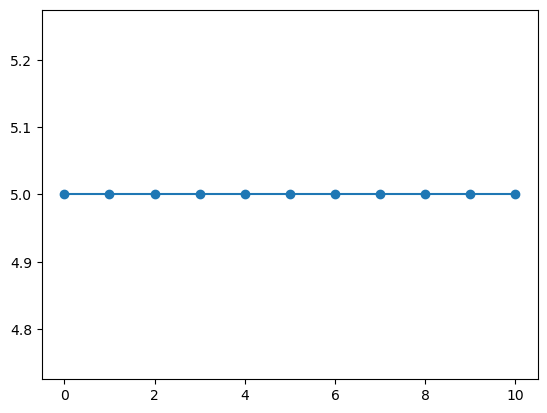

In [30]:
x=range(0,11)
y=[5 for i in range(0,11)]
plt.scatter(x,y)
plt.plot(x,y)

In [32]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


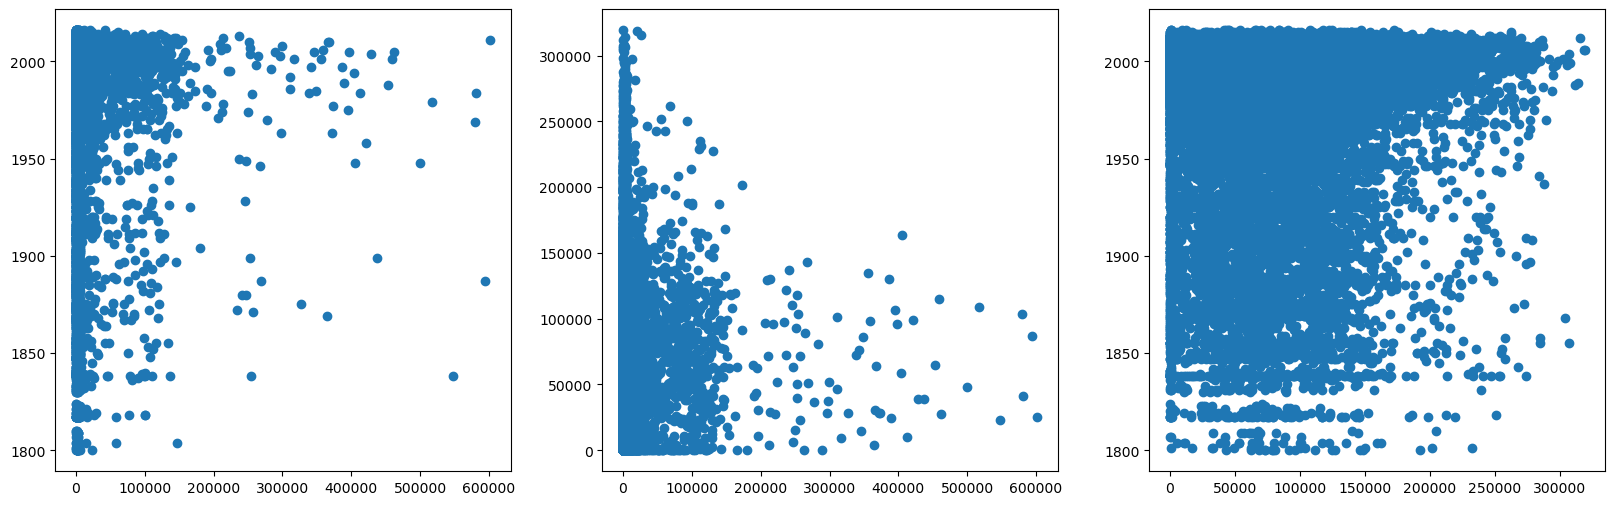

In [42]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(visa_df['no_of_employees'],visa_df['yr_of_estab'])

plt.subplot(1,3,2)
plt.scatter(visa_df['no_of_employees'],visa_df['prevailing_wage'])

plt.subplot(1,3,3)
plt.scatter(visa_df['prevailing_wage'],visa_df['yr_of_estab'])

In [44]:
wine_df=pd.read_csv(r"C:\Users\RavindharRajula\NareshIT\Data_set_files\winequality_red.csv")
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [54]:
cr=wine_df.corr(numeric_only=True)
cr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


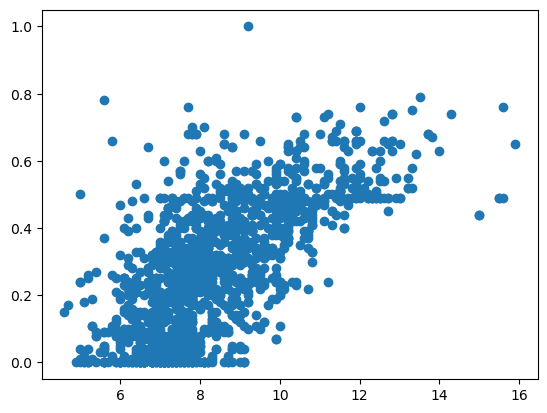

In [52]:
plt.scatter(wine_df['fixed acidity'],wine_df['citric acid'])

### HeatMap

- any matrix values can we visualize using a heatmap
- Heat map will provide colors for different values
- Heat map also provide colors bars whaich indicates,the color and its value
- for example the values ranges from 0.8 to 1 display as blue color
- so we need to check values,we can directly see the blue color
- so immediately we can sense blue color means highesh values which is 0.8 to 1
- heat map is avail in seaborn

<Axes: >

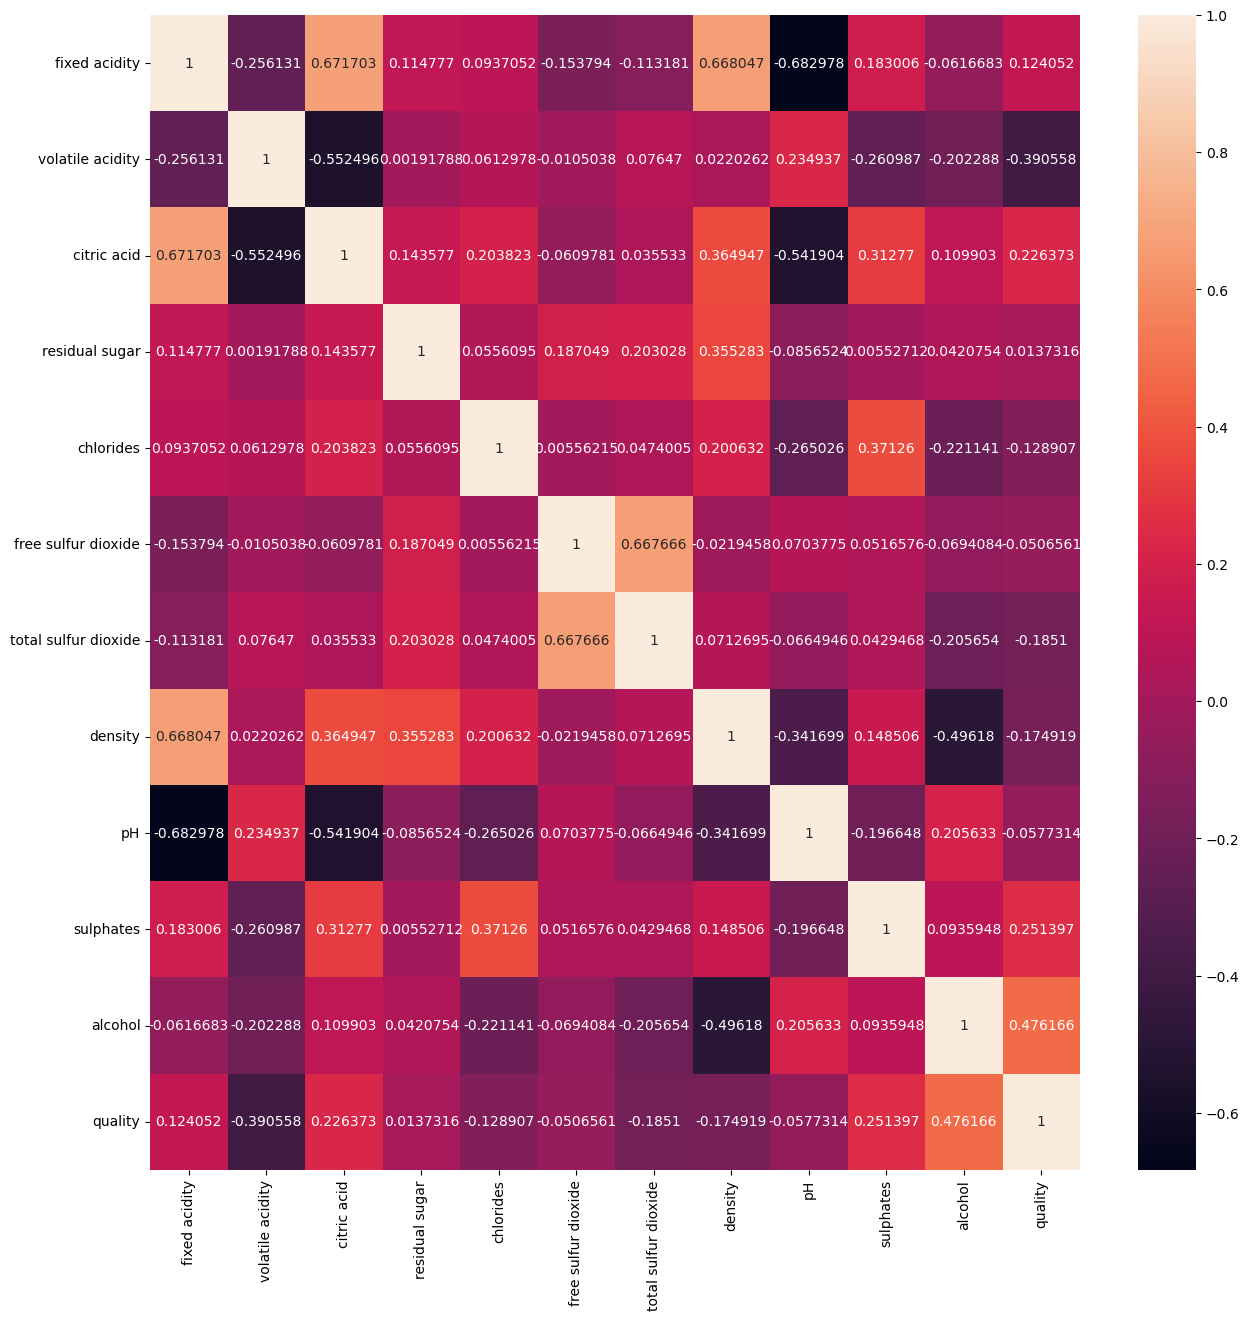

In [67]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(cr,annot=True,fmt='g')

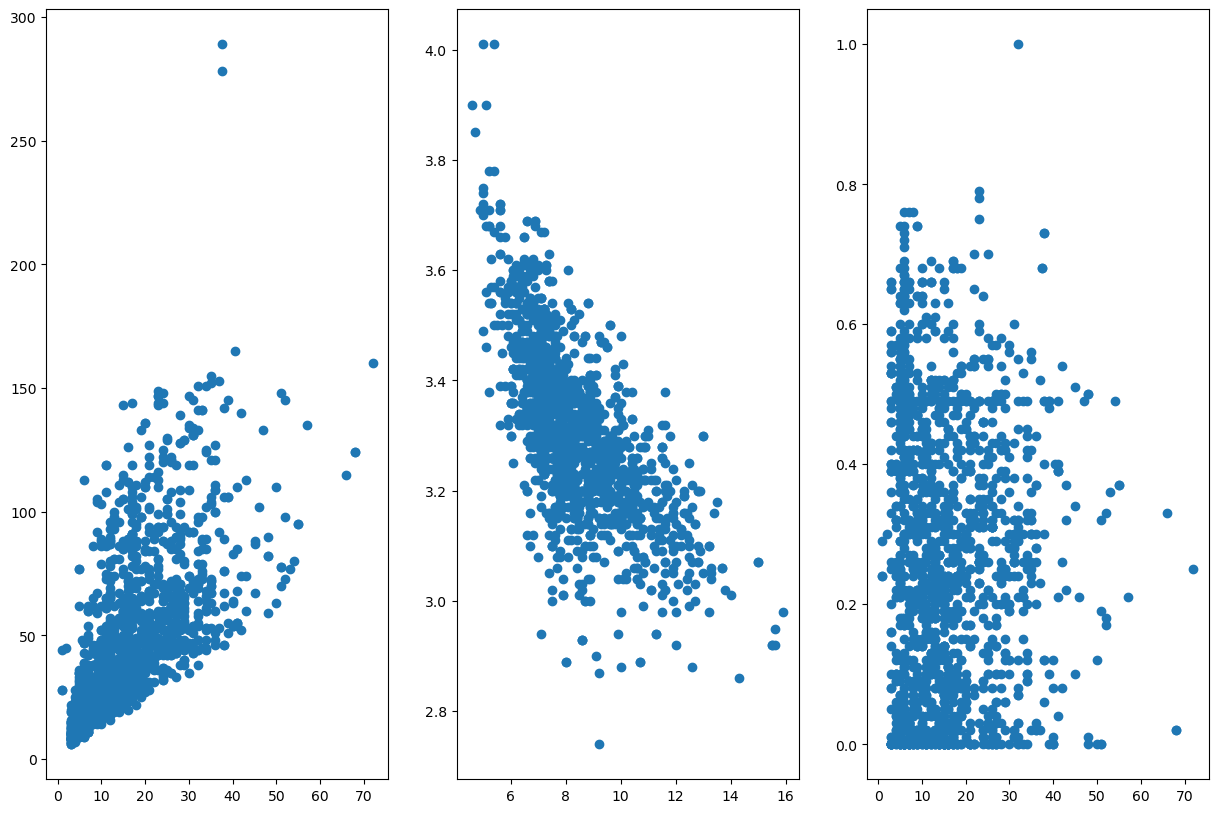

In [75]:
col1=wine_df['free sulfur dioxide']
col2=wine_df['total sulfur dioxide']
col3=wine_df['fixed acidity']
col4=wine_df['pH']
col5=wine_df['citric acid']

plt.figure(figsize=(15,10))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)


# crossTab practise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The Dataset
data = {
    'Department': ['Sales', 'Tech', 'Tech', 'Sales', 'Tech', 'Sales', 'Tech', 'Sales'],
    'Gender':     ['F', 'M', 'F', 'M', 'M', 'F', 'F', 'M'],
    'Performance':['High', 'Low', 'High', 'Medium', 'High', 'Medium', 'Low', 'Low'],
    'Salary':     [60000, 50000, 75000, 55000, 80000, 62000, 52000, 58000]
}

df = pd.DataFrame(data)

In [3]:
# freq count
pd.crosstab(df['Department'],df['Gender'])

Gender,F,M
Department,,
Sales,2,2
Tech,2,2


In [5]:
# margins (like total amount)
pd.crosstab(df.Department,df.Gender,margins=True,margins_name='total')

Gender,F,M,total
Department,,,
Sales,2,2,4
Tech,2,2,4
total,4,4,8


In [10]:
# percentage {Normalize =True}
pd.crosstab(df.Department,df.Gender,margins=True,margins_name='total',normalize='index')

Gender,F,M
Department,,
Sales,0.5,0.5
Tech,0.5,0.5
total,0.5,0.5


In [20]:

pd.crosstab([df.Department,df.Performance],df.Gender)

Gender                  F  M
Department Performance      
Sales      High         1  0
           Low          0  1
           Medium       1  1
Tech       High         1  1
           Low          1  1

In [22]:
pd.crosstab(pd.cut(df.Salary,bins=3,labels=['low','medium','hard']),df.Performance)

Performance,High,Low,Medium
Salary,,,
low,1,3,1
medium,0,0,1
hard,2,0,0


In [28]:
df=pd.read_csv(r'C:\Users\RavindharRajula\NareshIT\Data_set_files\Visadataset.csv')
high_earners=df.prevailing_wage>90000
pd.crosstab(df.loc[high_earners,'continent'],df.loc[high_earners,'case_status'])


case_status,Certified,Denied
continent,,
Africa,160,58
Asia,4602,2124
Europe,671,203
North America,705,386
Oceania,45,25
South America,150,89


In [29]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Filtering CrossTab using loc 

In [32]:
high_earners=df.prevailing_wage>90000
pd.crosstab(df.loc[high_earners,'continent'],df.loc[high_earners,'education_of_employee'],values=df.prevailing_wage,aggfunc='mean')



education_of_employee,Bachelor's,Doctorate,High School,Master's
continent,,,,
Africa,135561.986383,118566.074211,116398.823600,127147.170787
Asia,130178.349589,128642.618912,131874.573043,133149.395705
Europe,123922.542572,121136.112913,127667.824407,125392.643922
North America,127763.727608,127135.783483,126684.571404,130007.526550
Oceania,131101.502593,123454.356000,139258.743333,137553.505769
South America,120294.635577,128798.060526,127178.187297,130444.891013
